In [1]:
!pip install pandas matplotlib scikit-learn xgboost joblib tqdm

In [5]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import glob
import numpy as np
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # Show all columns
# Set seaborn theme
sns.set_theme(style='whitegrid')

In [3]:
df = pd.read_csv('sisam_focos_2003.csv')
df.head(10)

,datahora,longitude,latitude,co_ppb,no2_ppb,o3_ppb,pm25_ugm3,so2_ugm3,precipitacao_mmdia,temperatura_c,umidade_relativa_percentual,vento_direcao_grau,vento_velocidade_ms,data_pas,satelite,pais,estado,municipio,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,id_area_industrial,frp,time_diff_hours,incendio
0,2003-01-01,-67.0527,-10.0759,147.5,0.3,3.7,13.7,0.1,4.0,25.7,96,10,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2003-01-01,-69.5672,-10.9409,138.3,0.0,6.9,12.2,0.0,0.0,24.5,95,339,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2003-01-01,-68.7488,-11.0010,135.4,0.1,8.2,12.0,0.0,0.0,24.7,96,338,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2003-01-01,-67.9521,-9.8310,134.3,0.2,6.5,11.9,0.1,4.0,25.6,95,346,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2003-01-01,-67.6760,-10.5741,138.3,0.2,6.6,12.3,0.1,1.0,25.8,92,341,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2003-01-01,-72.6704,-7.6308,139.4,0.1,4.9,12.8,0.0,4.0,26.1,90,105,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,2003-01-01,-68.7412,-11.0289,135.4,0.1,8.2,12.0,0.0,0.0,24.7,96,338,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,2003-01-01,-70.3540,-8.1649,138.9,0.2,4.3,12.9,0.0,0.0,26.2,90,109,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,2003-01-01,-71.9481,-9.1911,141.2,0.0,5.7,14.5,0.0,15.0,25.6,92,346,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,2003-01-01,-72.9053,-7.6146,139.4,0.1,4.9,13.0,0.0,4.0,26.0,90,97,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Resumo de informações úteis do dataframe (principalmente contagem de elementos não-nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8135120 entries, 0 to 8135119
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   datahora                     object 
 1   longitude                    float64
 2   latitude                     float64
 3   co_ppb                       float64
 4   no2_ppb                      float64
 5   o3_ppb                       float64
 6   pm25_ugm3                    float64
 7   so2_ugm3                     float64
 8   precipitacao_mmdia           float64
 9   temperatura_c                float64
 10  umidade_relativa_percentual  int64  
 11  vento_direcao_grau           int64  
 12  vento_velocidade_ms          float64
 13  data_pas                     object 
 14  satelite                     object 
 15  pais                         object 
 16  estado                       object 
 17  municipio                    object 
 18  bioma                        object 
 19  

In [5]:
df = df.drop(columns=["data_pas", "satelite", "pais", "estado", "municipio", "bioma", "numero_dias_sem_chuva", "precipitacao", "risco_fogo", "id_area_industrial", "frp", "time_diff_hours"])
df = df.dropna()
print(len(df))
df.head(10)

2032728


,datahora,longitude,latitude,co_ppb,no2_ppb,o3_ppb,pm25_ugm3,so2_ugm3,precipitacao_mmdia,temperatura_c,umidade_relativa_percentual,vento_direcao_grau,vento_velocidade_ms,incendio
0,2003-01-01,-67.0527,-10.0759,147.5,0.3,3.7,13.7,0.1,4.0,25.7,96,10,1.3,0
1,2003-01-01,-69.5672,-10.9409,138.3,0.0,6.9,12.2,0.0,0.0,24.5,95,339,1.3,0
2,2003-01-01,-68.7488,-11.0010,135.4,0.1,8.2,12.0,0.0,0.0,24.7,96,338,1.1,0
3,2003-01-01,-67.9521,-9.8310,134.3,0.2,6.5,11.9,0.1,4.0,25.6,95,346,1.4,0
4,2003-01-01,-67.6760,-10.5741,138.3,0.2,6.6,12.3,0.1,1.0,25.8,92,341,1.2,0
5,2003-01-01,-72.6704,-7.6308,139.4,0.1,4.9,12.8,0.0,4.0,26.1,90,105,0.5,0
6,2003-01-01,-68.7412,-11.0289,135.4,0.1,8.2,12.0,0.0,0.0,24.7,96,338,1.1,0
7,2003-01-01,-70.3540,-8.1649,138.9,0.2,4.3,12.9,0.0,0.0,26.2,90,109,0.3,0
8,2003-01-01,-71.9481,-9.1911,141.2,0.0,5.7,14.5,0.0,15.0,25.6,92,346,1.2,0
9,2003-01-01,-72.9053,-7.6146,139.4,0.1,4.9,13.0,0.0,4.0,26.0,90,97,0.5,0


In [6]:
class ProgressMonitor:
    def __init__(self, total_folds):
        self.pbar = tqdm(total=total_folds, desc="Folds completos", unit="fold")

    def update(self, fold, mse, r2):
        self.pbar.set_postfix({
            'Fold': f"{fold+1}/{self.pbar.total}",
            'MSE': f"{mse:.4f}",
            'R²': f"{r2:.4f}"
        })
        self.pbar.update(1)

In [7]:
#Função que aplica o k-fold trainer
def kfold_with_progress(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores, r2_scores = [], []
    monitor = ProgressMonitor(n_splits)
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Barra de progresso para o treino
        with tqdm(total=100, desc=f"Treino Fold {fold+1}", leave=False) as pbar_train:
            model.fit(X_train, y_train)
            for i in range(100):
                pbar_train.update(1)  # Simula progresso

        #Calcular tempo total de predição
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        monitor.update(fold, mse, r2)

    monitor.pbar.close()
    return np.mean(mse_scores), np.std(mse_scores), np.mean(r2_scores), np.std(r2_scores)

In [12]:
#Selecionar uma amostra aleatória balanceada do dataset para treino
df_0 = df[df['incendio'] == 0].sample(n=125000, random_state=42)
df_1 = df[df['incendio'] == 1].sample(n=125000, random_state=42)

df_sample = pd.concat([df_0, df_1]).sample(frac=1, random_state=42)  # Embaralha

# Separação entre X e y
X = df_sample.drop(columns=['incendio', 'datahora', 'longitude', 'latitude'])
y = df_sample['incendio']

In [13]:
#Para KFold
k_values = [3, 5]

# SVR e MLP precisam de scaling de dados
mlp = make_pipeline(StandardScaler(), MLPRegressor(max_iter=200, hidden_layer_sizes=(100,100), random_state=42))

models = [
    RandomForestRegressor(random_state=42),
    mlp,
    xg.XGBRegressor(objective='reg:squarederror',n_estimators=100,seed=123),
]

modelNames = ['RF', 'MLP', 'XGBoost']

results = []
print("Iniciando avaliação de K-Fold\n")
for i in range(len(models)) :
    result = {'mse': {}, 'r2': {}}
    for k in k_values:
        print(f"\n{'='*30} Model = {modelNames[i]} --- K = {k} {'='*30}")
        mse_mean, mse_std, r2_mean, r2_std = kfold_with_progress(models[i], X, y, n_splits=k)
        result['mse'][k] = {'mean': mse_mean, 'std': mse_std}
        result['r2'][k] = {'mean': r2_mean, 'std': r2_std}
        
    results.append(result)
    joblib.dump(models[i], f"{modelNames[i]}.pkl")
    print(f"{'='*30} {modelNames[i]} metrics ({k} folds){'='*30}\nMean Squared Error: {result['mse'][k]['mean']:.2f} --- R²: {result['r2'][k]['mean']*100:.2f}\n\n" )

Iniciando avaliação de K-Fold


============================== Model = RF --- K = 3 ==============================


Folds completos: 100%|██████████| 3/3 [07:37<00:00, 152.49s/fold, Fold=3/3, MSE=0.1529, R²=0.3883]



============================== Model = RF --- K = 5 ==============================


Folds completos: 100%|██████████| 5/5 [13:11<00:00, 158.28s/fold, Fold=5/5, MSE=0.1525, R²=0.3902]



============================== RF metrics (5 folds)==============================
Mean Squared Error: 0.15 --- R²: 39.54



============================== Model = MLP --- K = 3 ==============================


Folds completos: 100%|██████████| 3/3 [07:55<00:00, 158.51s/fold, Fold=3/3, MSE=0.1522, R²=0.3912]



============================== Model = MLP --- K = 5 ==============================


Folds completos: 100%|██████████| 5/5 [14:34<00:00, 174.96s/fold, Fold=5/5, MSE=0.1524, R²=0.3903]



============================== MLP metrics (5 folds)==============================
Mean Squared Error: 0.15 --- R²: 39.37



============================== Model = XGBoost --- K = 3 ==============================


Folds completos: 100%|██████████| 3/3 [00:02<00:00,  1.19fold/s, Fold=3/3, MSE=0.1547, R²=0.3814]



============================== Model = XGBoost --- K = 5 ==============================


Folds completos: 100%|██████████| 5/5 [00:04<00:00,  1.11fold/s, Fold=5/5, MSE=0.1541, R²=0.3838]

============================== XGBoost metrics (5 folds)==============================
Mean Squared Error: 0.15 --- R²: 38.75





Grid Search de Threshold para o modelo (TESTE): RF
Melhor threshold para RF (TESTE): 0.30
Acurácia: 0.8797
Precisão: 0.4795
Recall: 0.5133
F1 Score: 0.4958
Matriz de Confusão:
Melhor threshold para RF (TESTE): 0.30
Acurácia: 0.8797
Precisão: 0.4795
Recall: 0.5133
F1 Score: 0.4958
Matriz de Confusão:


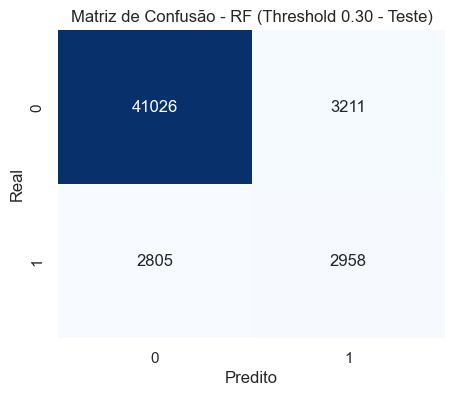

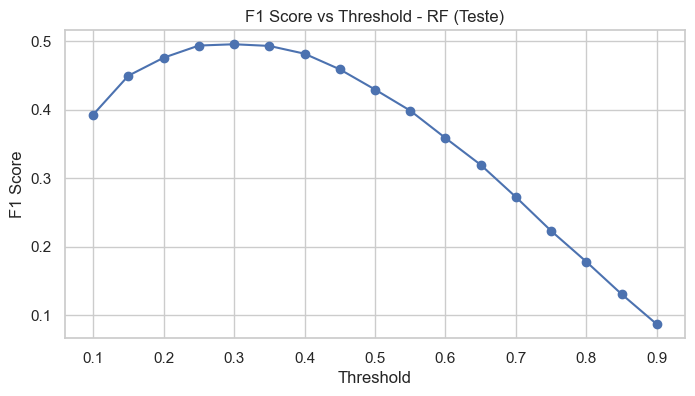


Grid Search de Threshold para o modelo (TESTE): MLP
Melhor threshold para MLP (TESTE): 0.25
Acurácia: 0.8762
Precisão: 0.4688
Recall: 0.5537
F1 Score: 0.5077
Matriz de Confusão:
Melhor threshold para MLP (TESTE): 0.25
Acurácia: 0.8762
Precisão: 0.4688
Recall: 0.5537
F1 Score: 0.5077
Matriz de Confusão:


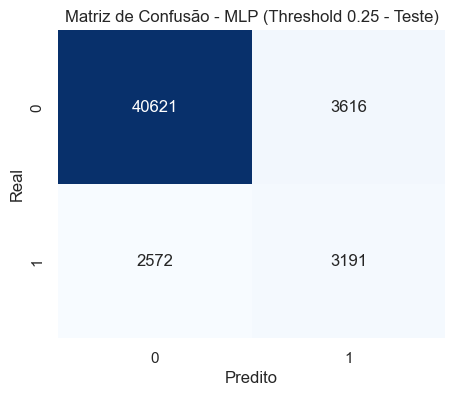

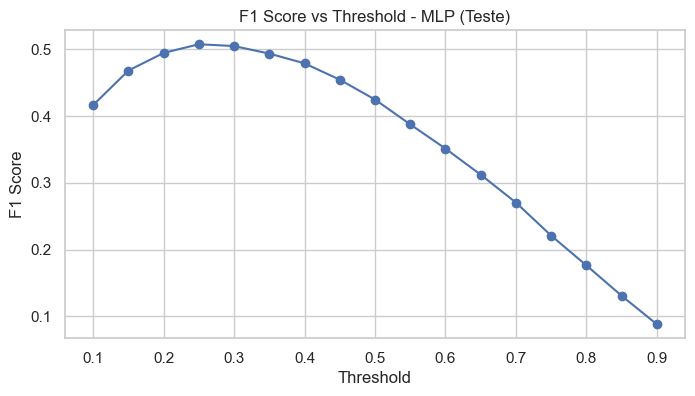


Grid Search de Threshold para o modelo (TESTE): XGBoost
Melhor threshold para XGBoost (TESTE): 0.25
Acurácia: 0.8755
Precisão: 0.4655
Recall: 0.5416
F1 Score: 0.5007
Matriz de Confusão:
Melhor threshold para XGBoost (TESTE): 0.25
Acurácia: 0.8755
Precisão: 0.4655
Recall: 0.5416
F1 Score: 0.5007
Matriz de Confusão:


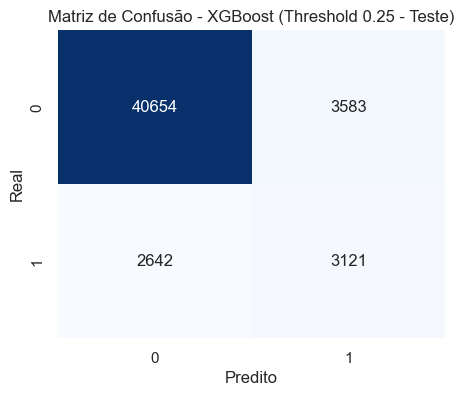

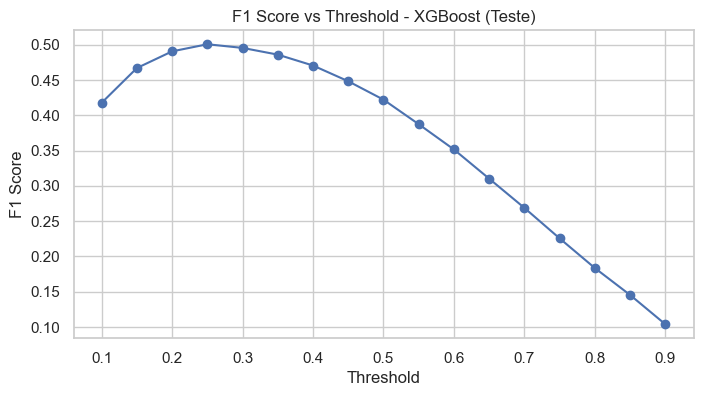

In [ ]:
# Separar um novo sample para teste (sem sobreposição com o de treino)
df_test = df.drop(df_sample.index).sample(n=50000, random_state=123)
X_test = df_test.drop(columns=['incendio', 'datahora', 'longitude', 'latitude'])
y_test = df_test['incendio']

thresholds = np.arange(0.1, 0.91, 0.05)

for i, model in enumerate(models):
    print(f'\nGrid Search de Threshold para o modelo (TESTE): {modelNames[i]}')
    best_f1 = 0
    best_threshold = 0.5
    best_metrics = {}
    f1_scores = []
    for threshold in thresholds:
        y_pred_prob = model.predict(X_test)
        y_pred_class = (y_pred_prob >= threshold).astype(int)
        acc = accuracy_score(y_test, y_pred_class)
        prec = precision_score(y_test, y_pred_class)
        rec = recall_score(y_test, y_pred_class)
        f1 = f1_score(y_test, y_pred_class)
        f1_scores.append(f1)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
            best_metrics = {
                'acc': acc,
                'prec': prec,
                'rec': rec,
                'f1': f1,
                'cm': confusion_matrix(y_test, y_pred_class)
            }
    print(f'Melhor threshold para {modelNames[i]} (TESTE): {best_threshold:.2f}')
    print(f'Acurácia: {best_metrics["acc"]:.4f}')
    print(f'Precisão: {best_metrics["prec"]:.4f}')
    print(f'Recall: {best_metrics["rec"]:.4f}')
    print(f'F1 Score: {best_metrics["f1"]:.4f}')
    print('Matriz de Confusão:')
    plt.figure(figsize=(5,4))
    sns.heatmap(best_metrics['cm'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {modelNames[i]} (Threshold {best_threshold:.2f} - Teste)')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    # Plot F1 score vs threshold
    plt.figure(figsize=(8,4))
    plt.plot(thresholds, f1_scores, marker='o')
    plt.title(f'F1 Score vs Threshold - {modelNames[i]} (Teste)')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.grid(True)
    plt.show()


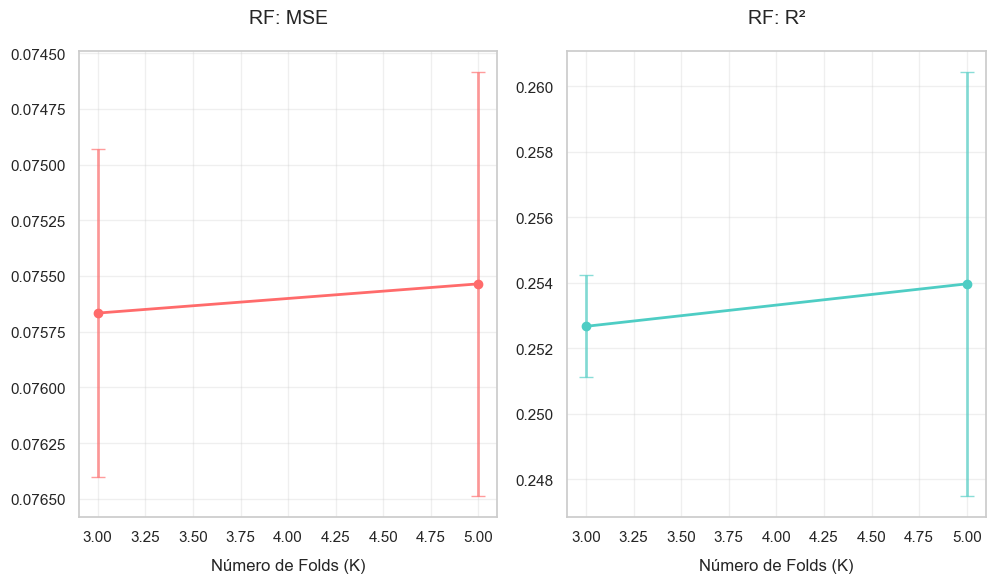

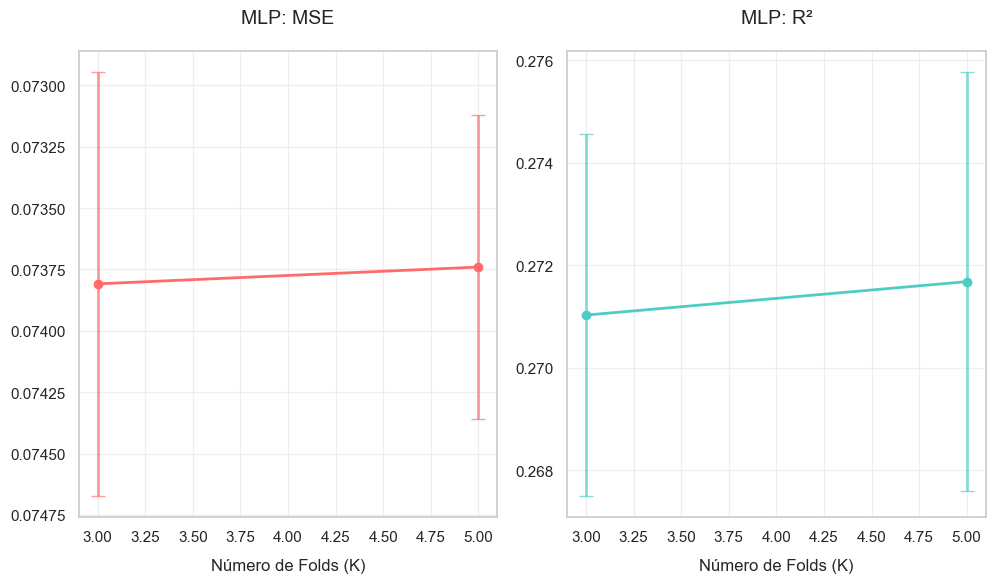

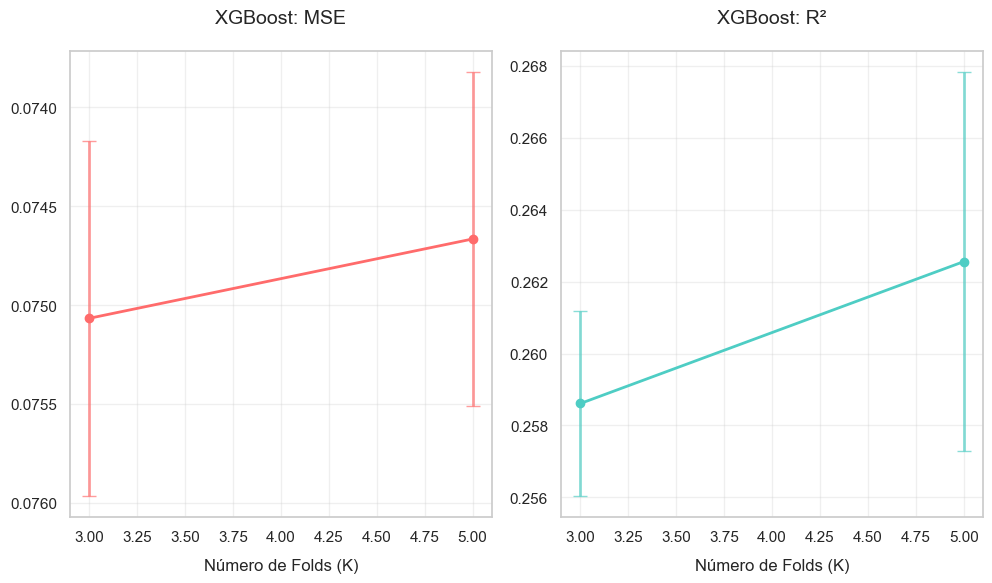

In [11]:
for i in range(len(models)):
    plt.figure(figsize=(15, 6))
    metrics = {
        'mse': {'color': '#FF6B6B', 'title': f'{modelNames[i]}: MSE'},
        'r2': {'color': '#4ECDC4', 'title': f'{modelNames[i]}: R²'},
    }

    for j, (metric, config) in enumerate(metrics.items(), 1):
        plt.subplot(1, 3, j)
        x = list(results[i][metric].keys())
        y = [results[i][metric][k]['mean'] for k in x]
        y_err = [results[i][metric][k]['std'] for k in x]

        plt.errorbar(x, y, yerr=y_err, fmt='-o', color=config['color'],
                    ecolor=config['color']+'AA', capsize=5, linewidth=2)

        plt.title(config['title'], pad=20, fontsize=14)
        plt.xlabel('Número de Folds (K)', labelpad=10)
        plt.grid(True, alpha=0.3)
        if metric != 'r2':
            plt.gca().invert_yaxis()  # Inverte para mostrar o melhor no topo

    plt.tight_layout()
    plt.show()


Arquivo: clusterizacao/cluster_0_sul_mata.csv
Melhor threshold: 0.70
Acurácia: 0.9079
Precisão: 0.2413
Recall: 0.2941
F1 Score: 0.2651
Matriz de Confusão:


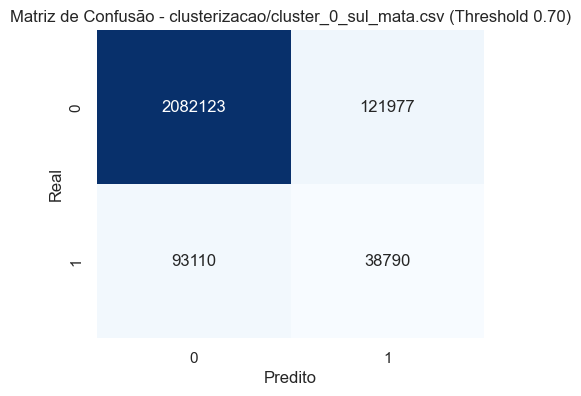

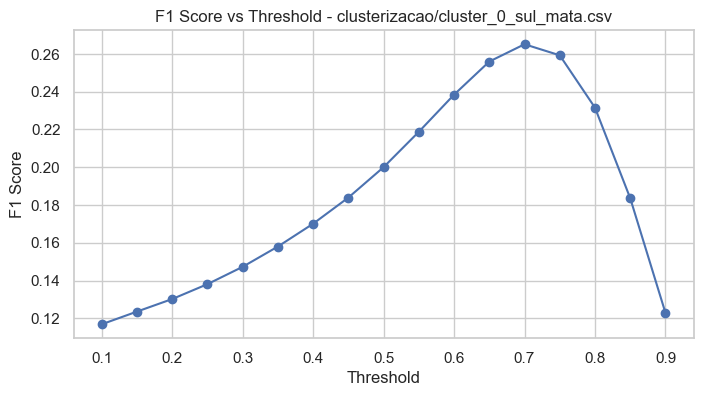


Arquivo: clusterizacao/cluster_4_metropoles.csv
Melhor threshold: 0.70
Acurácia: 0.9160
Precisão: 0.3637
Recall: 0.3006
F1 Score: 0.3291
Matriz de Confusão:


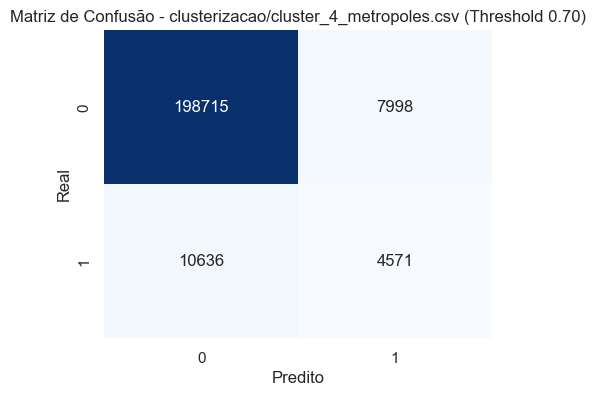

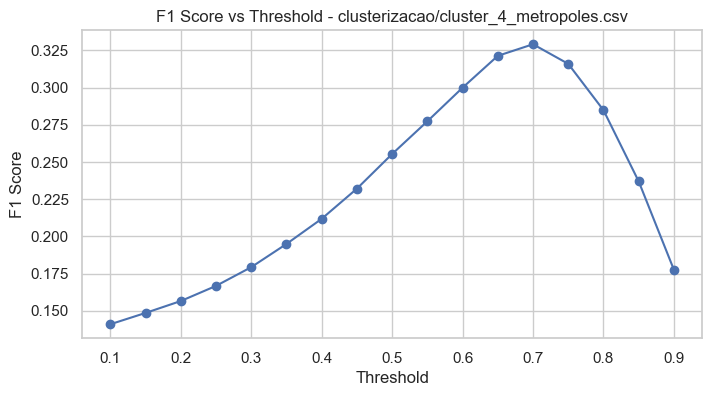


Arquivo: clusterizacao/cluster_1._litoralcsv.csv
Melhor threshold: 0.65
Acurácia: 0.8781
Precisão: 0.3372
Recall: 0.4003
F1 Score: 0.3661
Matriz de Confusão:


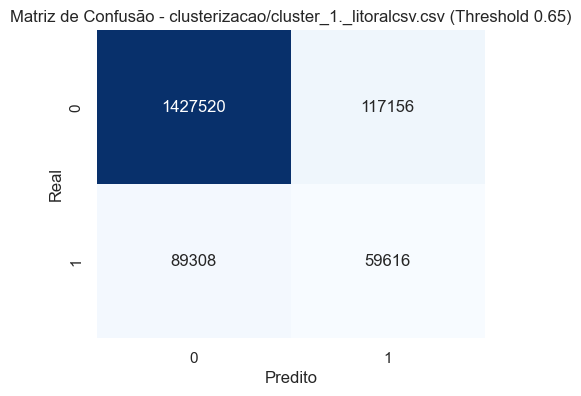

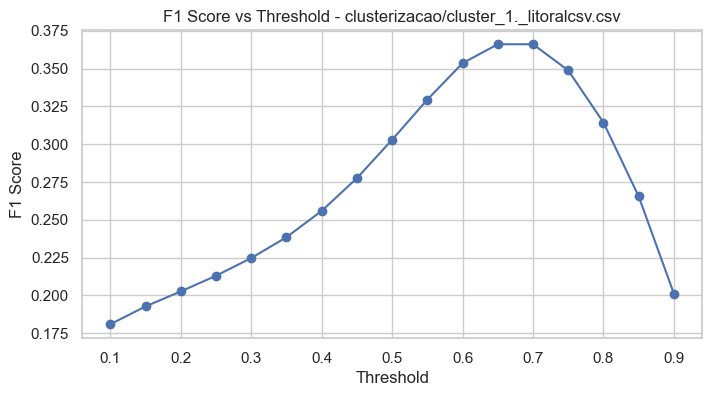


Arquivo: clusterizacao/cluster_3_amazonia.csv
Melhor threshold: 0.70
Acurácia: 0.7379
Precisão: 0.5414
Recall: 0.6748
F1 Score: 0.6008
Matriz de Confusão:


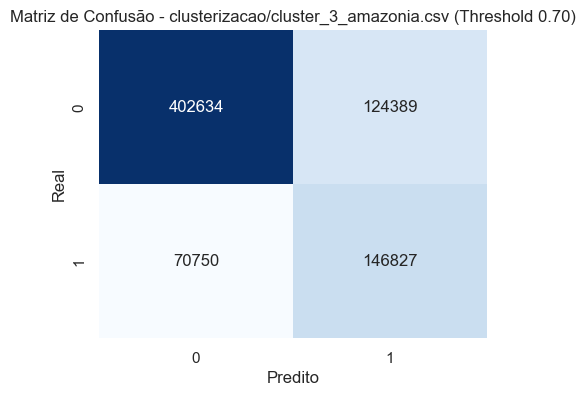

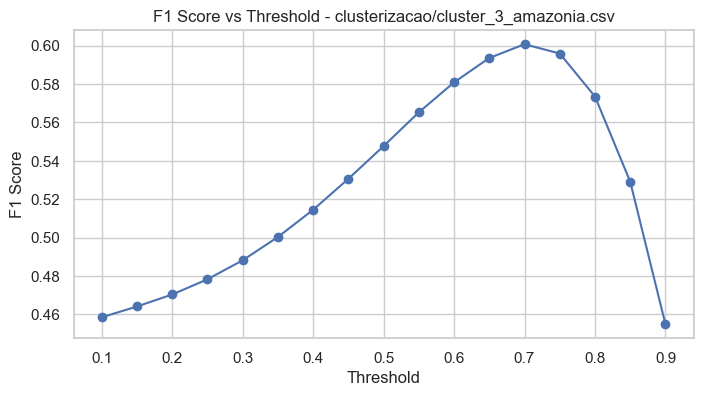


Arquivo: clusterizacao/cluster_2_caatinga.csv
Melhor threshold: 0.65
Acurácia: 0.7955
Precisão: 0.3885
Recall: 0.4956
F1 Score: 0.4356
Matriz de Confusão:


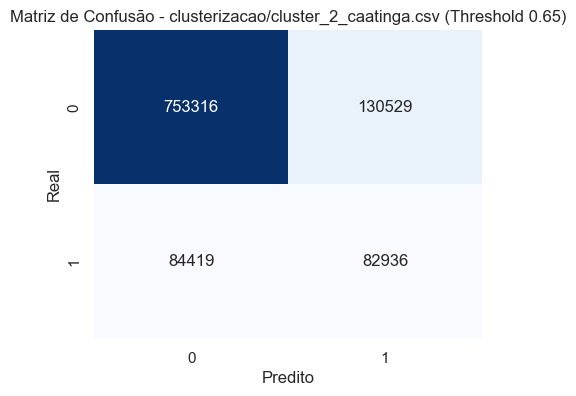

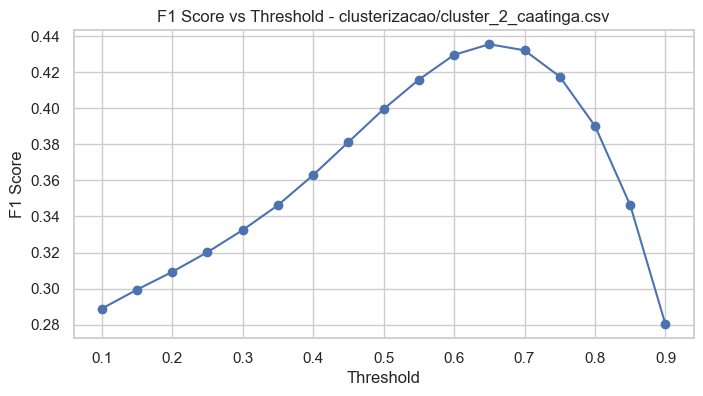


Arquivo: clusterizacao/cluster_5_cerrado.csv
Melhor threshold: 0.70
Acurácia: 0.8289
Precisão: 0.3207
Recall: 0.3677
F1 Score: 0.3426
Matriz de Confusão:


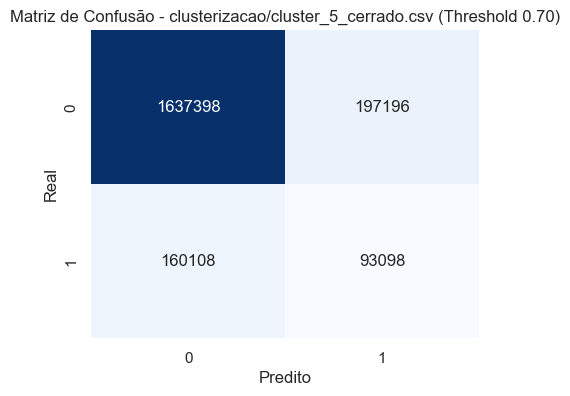

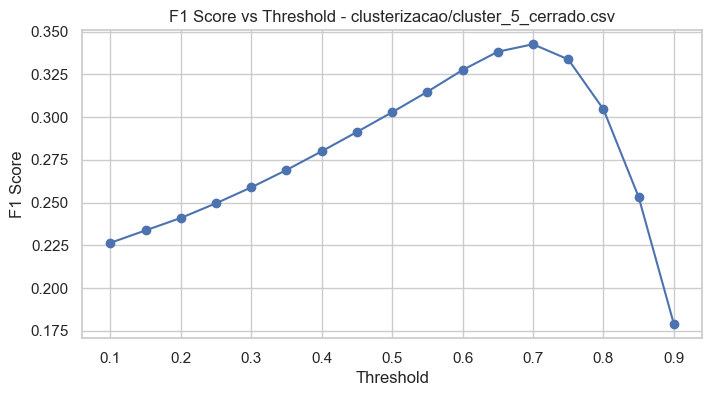

In [6]:
# Carregar o modelo RandomForest salvo
rf_model = joblib.load('RF.pkl')

# Caminho dos arquivos de clusterização
csv_files = glob.glob('clusterizacao/*.csv')

for csv_path in csv_files:
    print(f'\nArquivo: {csv_path}')
    df_cluster = pd.read_csv(csv_path)
    
    # Ajuste conforme suas colunas de entrada
    X_cluster = df_cluster.drop(columns=['incendio', 'datahora', 'longitude', 'latitude', 'data_pas', 'satelite', 'pais', 'estado', 'municipio', 'bioma', 'numero_dias_sem_chuva', 'precipitacao', 'risco_fogo', 'id_area_industrial', 'frp', 'time_diff_hours', 'Cluster'], errors='ignore')
    y_cluster = df_cluster['incendio'] if 'incendio' in df_cluster.columns else None

    # Previsão
    y_pred_prob = rf_model.predict(X_cluster)
    
    # Grid search de threshold
    thresholds = np.arange(0.1, 0.91, 0.05)
    best_f1 = 0
    best_threshold = 0.5
    best_metrics = {}
    f1_scores = []
    for threshold in thresholds:
        y_pred_class = (y_pred_prob >= threshold).astype(int)
        if y_cluster is not None:
            acc = accuracy_score(y_cluster, y_pred_class)
            prec = precision_score(y_cluster, y_pred_class)
            rec = recall_score(y_cluster, y_pred_class)
            f1 = f1_score(y_cluster, y_pred_class)
            f1_scores.append(f1)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
                best_metrics = {
                    'acc': acc,
                    'prec': prec,
                    'rec': rec,
                    'f1': f1,
                    'cm': confusion_matrix(y_cluster, y_pred_class)
                }
    if y_cluster is not None:
        print(f'Melhor threshold: {best_threshold:.2f}')
        print(f'Acurácia: {best_metrics["acc"]:.4f}')
        print(f'Precisão: {best_metrics["prec"]:.4f}')
        print(f'Recall: {best_metrics["rec"]:.4f}')
        print(f'F1 Score: {best_metrics["f1"]:.4f}')
        print('Matriz de Confusão:')
        plt.figure(figsize=(5,4))
        sns.heatmap(best_metrics['cm'], annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Matriz de Confusão - {csv_path} (Threshold {best_threshold:.2f})')
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.show()
        # Plot F1 score vs threshold
        plt.figure(figsize=(8,4))
        plt.plot(thresholds, f1_scores, marker='o')
        plt.title(f'F1 Score vs Threshold - {csv_path}')
        plt.xlabel('Threshold')
        plt.ylabel('F1 Score')
        plt.grid(True)
        plt.show()
    else:
        print('Coluna \"incendio\" não encontrada para avaliação.')